# CSS5228 Final Project

In this notebook, we will start training our model.

In [81]:
import pandas as pd
import numpy as np
from pathlib import Path
from math import sqrt
import gc

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from src.utils import highlight_top, save_fig

import warnings
warnings.filterwarnings("ignore")

# Configurations

In [82]:
pd.set_option('display.max_columns', None)

In [83]:
sns.set_theme(style="ticks")
sns.set_context("paper", rc={"xtick.labelsize":15,
                             "ytick.labelsize":15,
                             "axes.titlesize":20,
                             "axes.labelsize":15})
default_col = '#4c72b0'
highlight_col = '#c44d52'

img_dir = Path("images/")

In [84]:
size=20
params = {'legend.fontsize': 'large',
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75}
plt.rcParams.update(params)

# Import Data

In [85]:
df_train = pd.read_csv("../clean_data/train_preproc.csv", index_col=0)
df_test = pd.read_csv("../clean_data/test_preproc.csv", index_col=0)
df_submission = pd.read_csv("../raw_data/example-submission.csv")

In [86]:
df_train = df_train.drop(['property_type', 'subzone', 'planning_area'], axis=1)
df_test = df_test.drop(['property_type', 'subzone', 'planning_area'], axis=1)

In [87]:
X = df_train.drop("price", axis=1)
y = df_train["price"]
df_test = df_test.loc[:, X.columns]

# 1. Lasso Regression

In [88]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

print("Size of training set: {}".format(len(X_train)))
print("Size of test: {}".format(len(X_valid)))
print(len(X_valid), len(y_valid))

Size of training set: 16076
Size of test: 4020
4020 4020


In [89]:
from sklearn.preprocessing import StandardScaler
StandardScaler=StandardScaler()
traing_data=StandardScaler.fit_transform(X)
print(traing_data.shape)
print(y.shape)

(20096, 22)
(20096,)


In [95]:
lasso = Lasso()
params = {'alpha': [0.00005, 0.0001, 0.002, 0.003, 0.004, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 10, 100, 110, 150, 200, 400, 500, 1000]}
folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(traing_data, y) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.002, 0.003, 0.004, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 10, 100, 110, 120, 130, 150,
                                   200, 400, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [96]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results
# cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.628352,0.198113,0.001311,0.000890,0.00005,{'alpha': 5e-05},-891835.310588,-1.007848e+06,-909262.571619,-910503.666143,-905215.133654,-924932.945021,41983.148217,28,-949188.868584,-866403.702958,-933652.729281,-931240.729575,-930320.484797,-922161.303039,28707.003941
1,0.540781,0.034936,0.000889,0.000088,0.0001,{'alpha': 0.0001},-891835.310467,-1.007848e+06,-909262.571472,-910503.666001,-905215.133516,-924932.944882,41983.148212,27,-949188.868449,-866403.702835,-933652.729140,-931240.729437,-930320.484669,-922161.302906,28707.003936
2,0.792819,0.151204,0.000926,0.000112,0.002,{'alpha': 0.002},-891835.305842,-1.007848e+06,-909262.565876,-910503.660616,-905215.128273,-924932.939596,41983.148018,26,-949188.863326,-866403.698156,-933652.723782,-931240.724197,-930320.479813,-922161.297855,28707.003752
3,0.650730,0.199676,0.001102,0.000395,0.003,{'alpha': 0.003},-891835.303409,-1.007848e+06,-909262.562930,-910503.657782,-905215.125514,-924932.936815,41983.147916,25,-949188.860630,-866403.695694,-933652.720962,-931240.721439,-930320.477258,-922161.295196,28707.003656
4,0.748036,0.287416,0.000952,0.000163,0.004,{'alpha': 0.004},-891835.300975,-1.007848e+06,-909262.559985,-910503.654948,-905215.122754,-924932.934033,41983.147814,24,-949188.857934,-866403.693231,-933652.718142,-931240.718681,-930320.474702,-922161.292538,28707.003559
5,0.541378,0.029570,0.001558,0.001216,0.01,{'alpha': 0.01},-891835.286372,-1.007848e+06,-909262.542313,-910503.637943,-905215.106197,-924932.917342,41983.147201,23,-949188.841756,-866403.678456,-933652.701222,-931240.702132,-930320.459370,-922161.276587,28707.002979
6,0.642603,0.118306,0.001870,0.001305,0.05,{'alpha': 0.05},-891835.189022,-1.007848e+06,-909262.424497,-910503.524576,-905214.995816,-924932.806070,41983.143116,22,-949188.733904,-866403.579958,-933652.588422,-931240.591808,-930320.357150,-922161.170248,28706.999114
7,0.614027,0.049483,0.001158,0.000493,0.1,{'alpha': 0.1},-891835.067333,-1.007848e+06,-909262.277227,-910503.382867,-905214.857841,-924932.666980,41983.138011,21,-949188.599089,-866403.456834,-933652.447423,-931240.453902,-930320.229376,-922161.037325,28706.994282
8,0.637247,0.107675,0.001292,0.000870,0.2,{'alpha': 0.2},-891834.823957,-1.007847e+06,-909261.982687,-910503.099449,-905214.581889,-924932.388800,41983.127799,20,-949188.329460,-866403.210588,-933652.165424,-931240.178091,-930319.973827,-922160.771478,28706.984618
9,0.817788,0.237807,0.000959,0.000254,0.3,{'alpha': 0.3},-891834.580580,-1.007847e+06,-909261.688147,-910502.816031,-905214.305937,-924932.110620,41983.117587,19,-949188.059831,-866402.964341,-933651.883425,-931239.902280,-930319.718278,-922160.505631,28706.974953


In [97]:
print(model_cv.best_estimator_)

print(model_cv.best_params_)

Lasso(alpha=1000)
{'alpha': 1000}


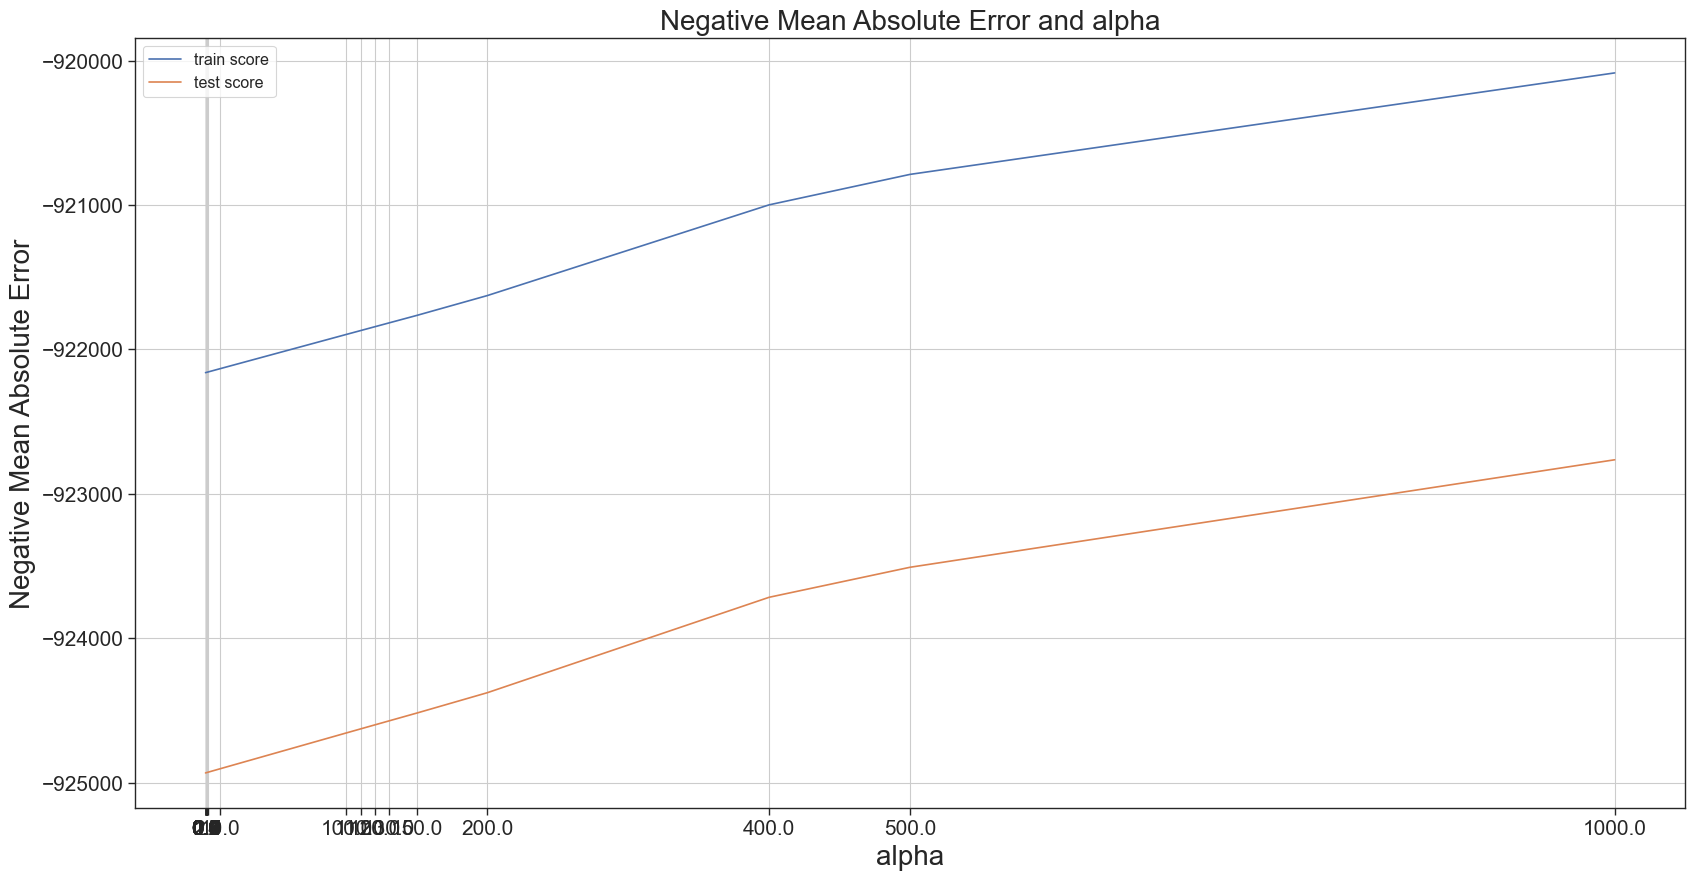

In [98]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xticks(cv_results['param_alpha'])
# plt.xlim(300)
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [99]:
alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X, y) 
lasso.coef_

array([-2.81698444e+04,  2.19047529e+05,  9.79753008e+04,  1.35161332e+03,
        2.54486564e+02,  1.94478895e+06, -2.79596541e+05, -1.59812994e+04,
        1.61290710e+01, -9.95327398e+01,  8.58392921e-01, -1.73616680e+03,
       -7.26592045e+02, -2.29947542e+02,  1.12701889e-01,  1.03448559e+04,
        1.35722408e+03,  5.88500139e-01,  9.83689371e+04,  1.20105317e+04,
        0.00000000e+00, -0.00000000e+00])

In [100]:
imp_lasso = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": lasso.coef_})
imp_lasso.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
5,lat,1.944789e+06
1,num_beds,2.190475e+05
18,distance,9.836894e+04
2,num_baths,9.797530e+04
19,num_shopping_malls,1.201053e+04
15,total_rooms,1.034486e+04
16,size_per_room,1.357224e+03
3,size_sqft,1.351613e+03
4,total_num_units,2.544866e+02
8,planning_area_density,1.612907e+01


In [101]:
y_pred = lasso.predict(df_test)

In [102]:
y_pred

array([1031197.54565212,  647150.90304035, 1398106.35378809, ...,
       3818826.98956631, 1579714.82644379, 4071219.04197364])

In [103]:
df_submission = pd.DataFrame({'Id': df_test.index,
                       'Predicted': y_pred.reshape(-1).round()})

In [104]:
df_submission = df_submission.loc[:,["Id", "Predicted"]]

In [105]:
df_submission.to_csv("submissions/train_lasso_model.csv", index=0)